# Laboratory 3: Color Models

## 1. Play with color

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import cv2
import sys

img = cv2.imread("/content/drive/MyDrive/Computer vision/Lab3/Images/shiba.jpg")

#if img is None:
#    sys.exit("Could not read the image.")

In [3]:
import matplotlib.pyplot as plt

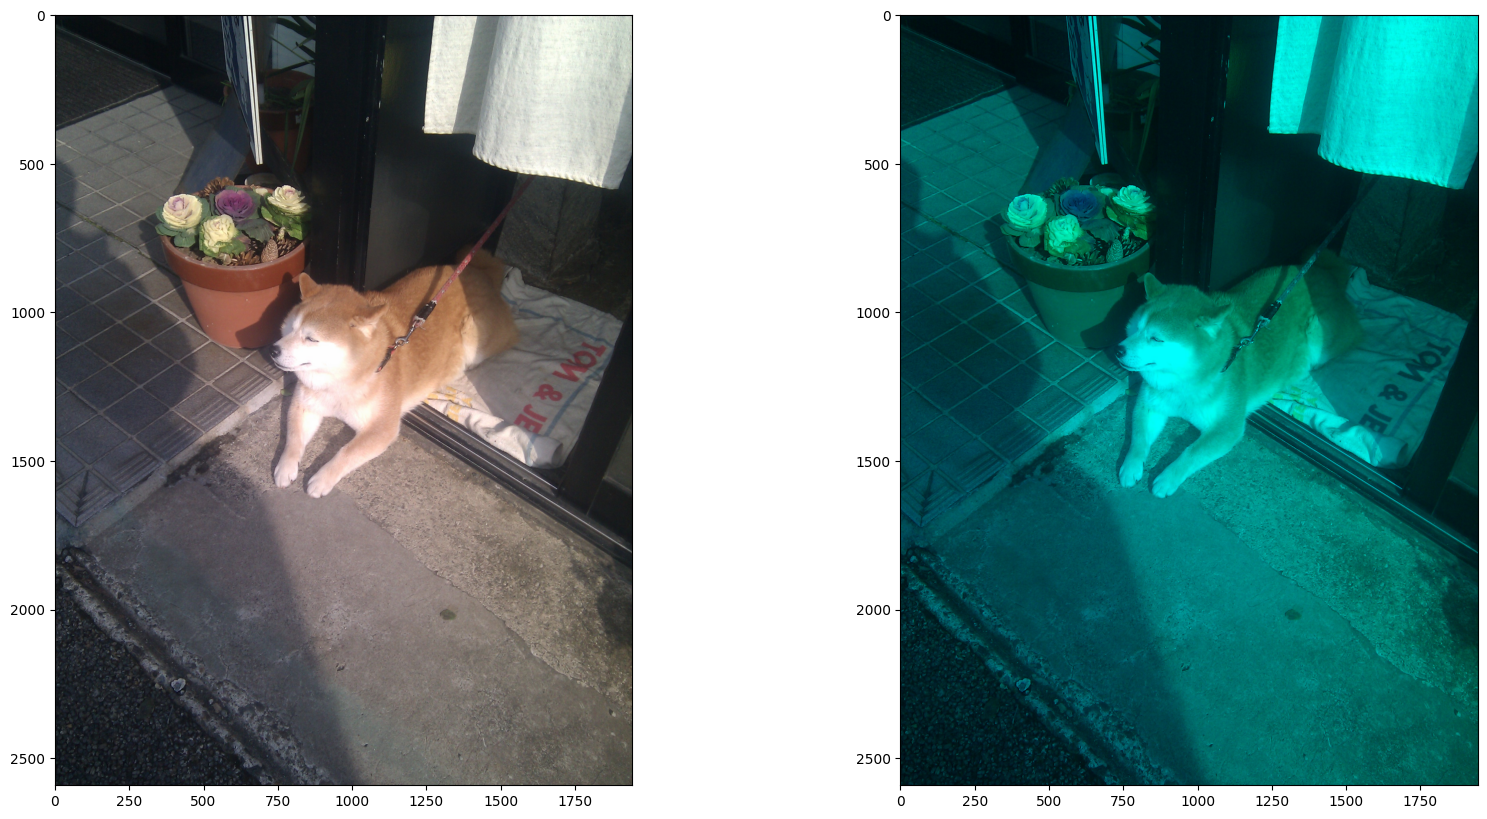

In [6]:
img_edited = img.copy()

#Remove Red color
img_edited[:, :, 2] = 0

# display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(img_edited, cv2.COLOR_BGR2RGB))
plt.show()

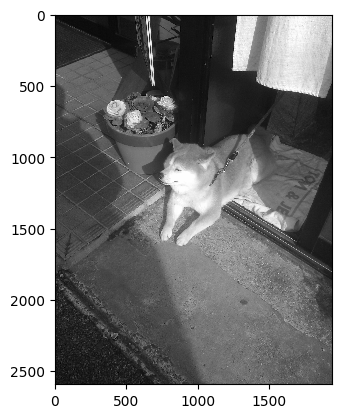

In [7]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
plt.show()

## 2. Image Thresholding

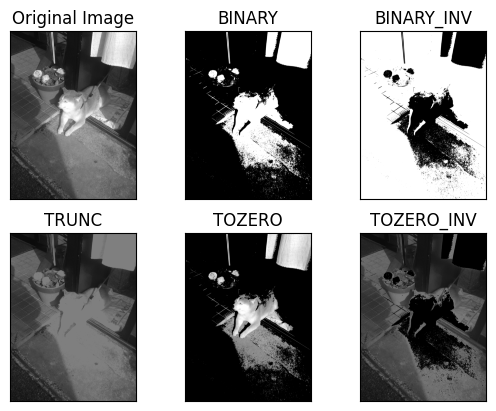

In [8]:
ret,thresh1 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_gray,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img_gray, thresh1, thresh2, thresh3, thresh4, thresh5]

# display the image
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [9]:
# Thresholding and Masking
result = cv2.bitwise_and(img_gray, img_gray, mask=thresh1)

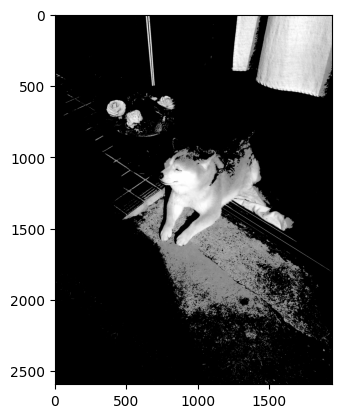

In [10]:
plt.imshow(result,'gray',vmin=0,vmax=255)

## 3. Finding Nemo

Modification of the code and data from: https://github.com/realpython/materials/tree/master/opencv-color-spaces

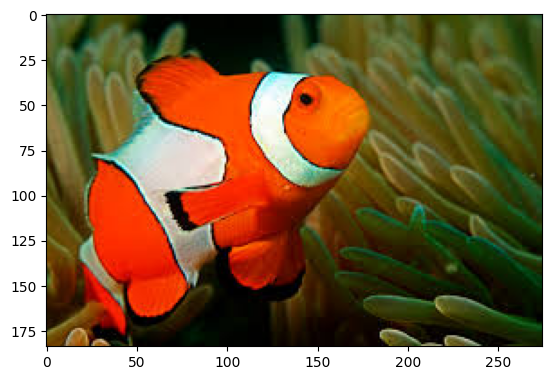

In [11]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors

from matplotlib.colors import hsv_to_rgb

# Let's look at our fish image
nemo = cv2.imread("/content/drive/MyDrive/Computer vision/Lab3/Images/nemo0.jpg")
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

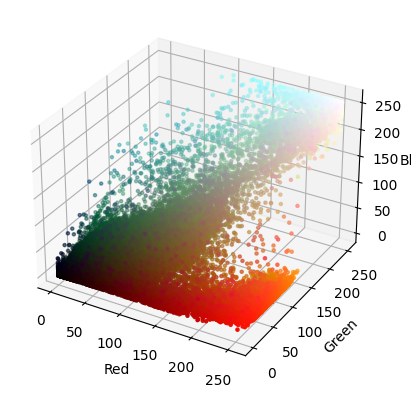

In [12]:
# Plotting the image on 3D plot
r, g, b = cv2.split(nemo)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = nemo.reshape((np.shape(nemo)[0] * np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.0, vmax=1.0)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(
    r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

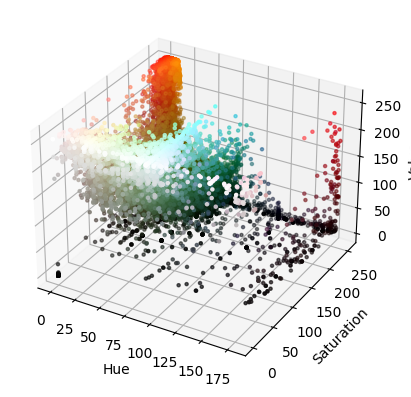

In [13]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_nemo)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(
    h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()


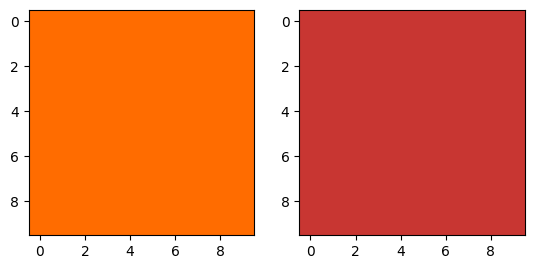

In [14]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

# Normalise to 0 - 1 range for viewing

lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

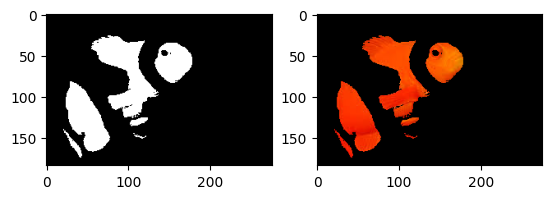

In [15]:
# Segment Nemo using inRange() function
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)

# Bitwise-AND mask and original image
result = cv2.bitwise_and(nemo, nemo, mask=mask)

# Convert back to RGB in order to plot using `matplotlib.pyplot`
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

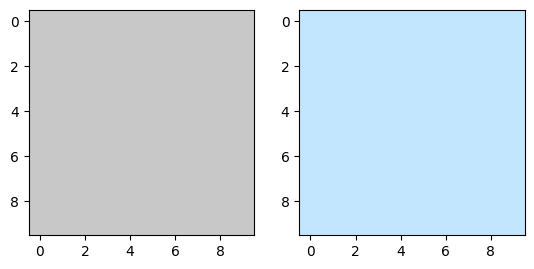

In [16]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()



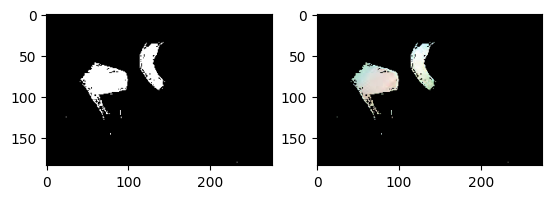

In [17]:
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

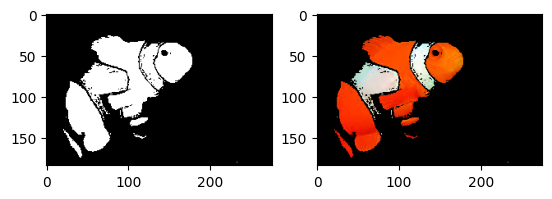

In [18]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)

plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()


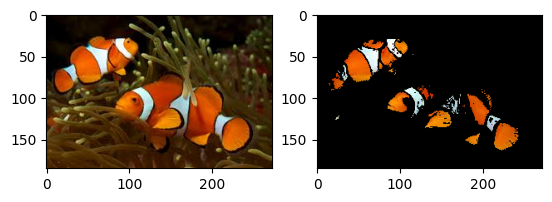

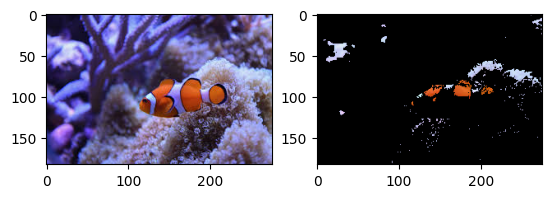

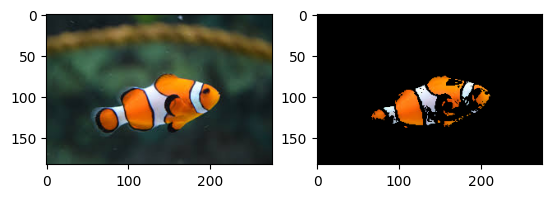

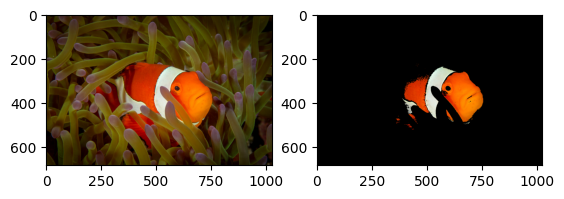

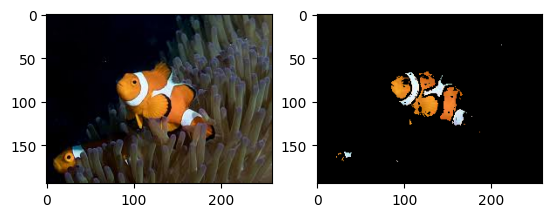

In [19]:
# Generalising the segmentation

path = "/content/drive/MyDrive/Computer vision/Lab3/Images/nemo"

nemos_friends = []
for i in range(6):
    friend = cv2.cvtColor(
        cv2.imread(path + str(i) + ".jpg"), cv2.COLOR_BGR2RGB
    )
    nemos_friends.append(friend)

def segment_fish(image):
    """Attempts to segment the clown fish out of the provided image."""
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    light_orange = (1, 190, 200)
    dark_orange = (18, 255, 255)
    mask = cv2.inRange(hsv_image, light_orange, dark_orange)
    light_white = (0, 0, 200)
    dark_white = (145, 60, 255)
    mask_white = cv2.inRange(hsv_image, light_white, dark_white)
    final_mask = mask + mask_white
    result = cv2.bitwise_and(image, image, mask=final_mask)
    # result = cv2.GaussianBlur(result, (7, 7), 0)
    return result

results = [segment_fish(friend) for friend in nemos_friends]

for i in range(1, 6):
    plt.subplot(1, 2, 1)
    plt.imshow(nemos_friends[i])
    plt.subplot(1, 2, 2)
    plt.imshow(results[i])
    plt.show()

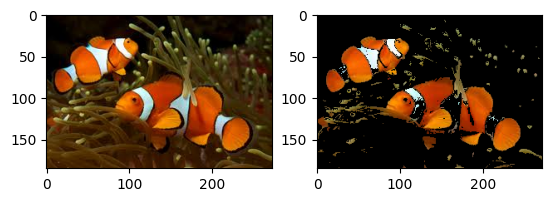

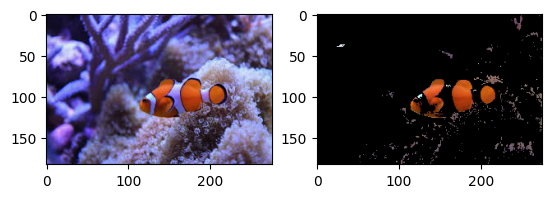

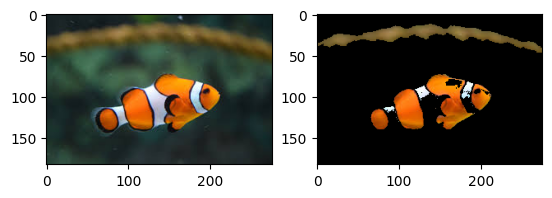

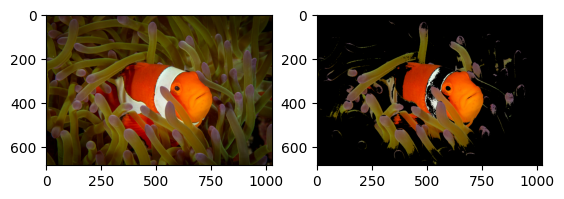

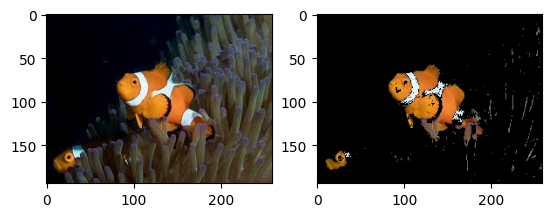

In [41]:
# Assignment 1 Optimize the color range to fully segment the whole body of each Nemo images.
# Try both RGB and HSV

# RGB
path = "/content/drive/MyDrive/Computer vision/Lab3/Images/nemo"

nemos_friends = []
for i in range(6):
    friend = cv2.cvtColor(
        cv2.imread(path + str(i) + ".jpg"), cv2.COLOR_BGR2RGB
    )
    nemos_friends.append(friend)

def segment_fish_RGB(image):
    """Attempts to segment the clown fish out of the provided image."""
    rgb_image = image.copy()
    min_orange = (102, 31, 0)
    max_orange = (255, 159, 119)
    mask = cv2.inRange(rgb_image, min_orange, max_orange)
    min_white = (162, 230, 205)
    max_white = (255, 255, 255)
    mask_white = cv2.inRange(rgb_image, min_white, max_white)
    final_mask = mask + mask_white
    result = cv2.bitwise_and(image, image, mask=final_mask)
    # result = cv2.GaussianBlur(result, (7, 7), 0)
    return result

results = [segment_fish_RGB(friend) for friend in nemos_friends]

for i in range(1, 6):
    plt.subplot(1, 2, 1)
    plt.imshow(nemos_friends[i])
    plt.subplot(1, 2, 2)
    plt.imshow(results[i])
    plt.show()


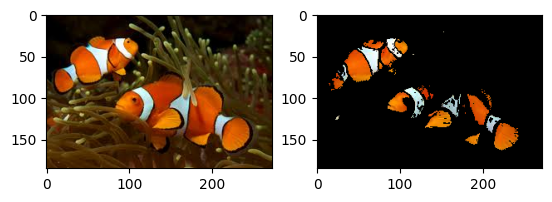

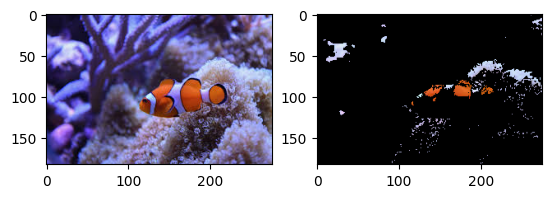

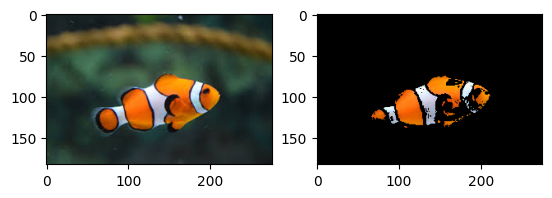

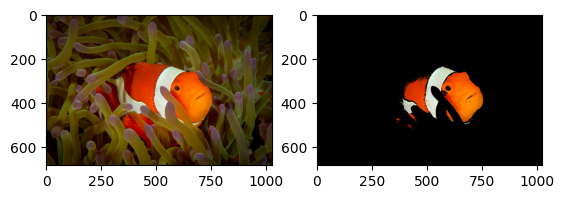

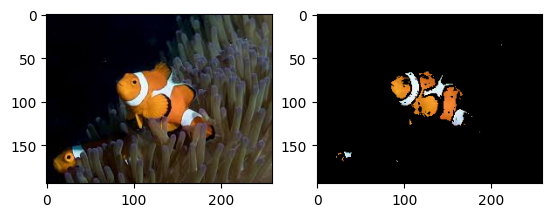

In [45]:
# Assignment 1 Optimize the color range to fully segment the whole body of each Nemo images.
# Try both RGB and HSV

# HSV
path = "/content/drive/MyDrive/Computer vision/Lab3/Images/nemo"

nemos_friends = []
for i in range(6):
    friend = cv2.cvtColor(
        cv2.imread(path + str(i) + ".jpg"), cv2.COLOR_BGR2RGB
    )
    nemos_friends.append(friend)

def segment_fish(image):
    """Attempts to segment the clown fish out of the provided image."""
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    light_orange = (1, 190, 200)
    dark_orange = (18, 255, 255)
    mask = cv2.inRange(hsv_image, light_orange, dark_orange)
    light_white = (0, 0, 185)
    dark_white = (145, 60, 255)
    mask_white = cv2.inRange(hsv_image, light_white, dark_white)
    final_mask = mask + mask_white
    result = cv2.bitwise_and(image, image, mask=final_mask)
    # result = cv2.GaussianBlur(result, (7, 7), 0)
    return result

results = [segment_fish(friend) for friend in nemos_friends]

for i in range(1, 6):
    plt.subplot(1, 2, 1)
    plt.imshow(nemos_friends[i])
    plt.subplot(1, 2, 2)
    plt.imshow(results[i])
    plt.show()

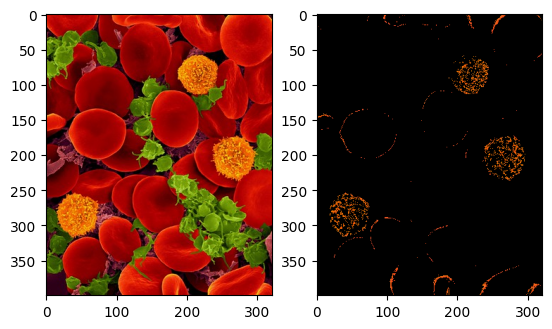

In [73]:
# Assignment 2 Select a target object of your choice. Write a code to detect the color of target object.
# Try both RGB and HSV.

# RGB
obj_img = cv2.imread("/content/drive/MyDrive/Computer vision/Lab3/Images/blood2.jpg")
img = cv2.cvtColor(obj_img, cv2.COLOR_BGR2RGB)

def segment_fish(image):
    """Attempts to segment the clown fish out of the provided image."""
    hsv_image = image.copy()
    light_orange = (206, 72, 1)
    dark_orange = (254, 125, 56)
    mask = cv2.inRange(hsv_image, light_orange, dark_orange)
    result = cv2.bitwise_and(image, image, mask=mask)
    # result = cv2.GaussianBlur(result, (7, 7), 0)
    return result

#results = [segment_fish(friend) for friend in nemos_friends]
results = segment_fish(img)

for i in range(1, 2):
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.subplot(1, 2, 2)
    plt.imshow(results)
    plt.show()

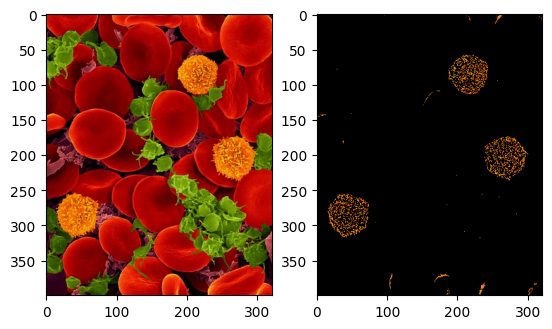

In [114]:
# HSV
obj_img = cv2.imread("/content/drive/MyDrive/Computer vision/Lab3/Images/blood2.jpg")
img = cv2.cvtColor(obj_img, cv2.COLOR_BGR2RGB)

def segment_fish(image):
    """Attempts to segment the clown fish out of the provided image."""
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    light_orange = (11, 0, 200)
    dark_orange = (28, 250, 250)
    mask = cv2.inRange(hsv_image, light_orange, dark_orange)
    result = cv2.bitwise_and(image, image, mask=mask)
    # result = cv2.GaussianBlur(result, (7, 7), 0)
    return result

#results = [segment_fish(friend) for friend in nemos_friends]
results = segment_fish(img)

for i in range(1, 2):
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.subplot(1, 2, 2)
    plt.imshow(results)
    plt.show()

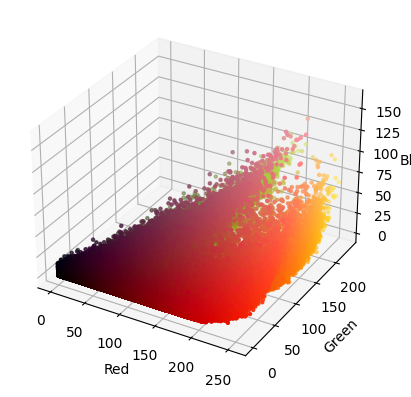

In [74]:
# Plotting the image on 3D plot
r, g, b = cv2.split(img)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = img.reshape((np.shape(img)[0] * np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1.0, vmax=1.0)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(
    r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

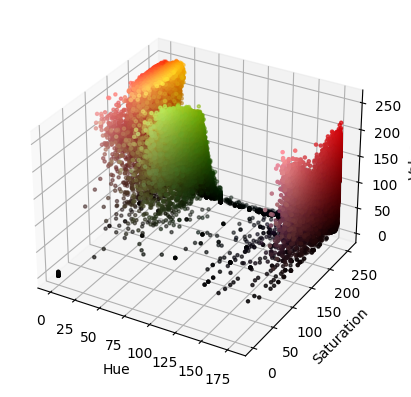

In [75]:
hsv_nemo = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_nemo)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(
    h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()